In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from  sklearn.metrics  import accuracy_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score

In [2]:
latestdata=pd.read_csv("new_no_stemmed_cleaned_data.csv")
len(latestdata)

23303

In [3]:
latestdata.head()

,target,EMOTION,text
0,😂,Joy,"<UNK> want yall sleep , shit does add up in <U..."
1,😂,Joy,This is hilarious !
2,😂,Joy,""" We can shoot your wife , Frame your mother ""..."
3,😂,Joy,Haha those were the days mate . On <UNK> <UNK>...
4,😂,Joy,Not only he <UNK> the best <UNK> at <UNK> but ...


In [4]:
latestdata.dropna(inplace=True)

In [5]:
latestdata.isnull().sum()

target     0
EMOTION    0
text       0
dtype: int64

In [8]:
def test_train_split(df):
    #splitting the data
    X=df["text"]
    y=df["EMOTION"]
    X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.20, random_state=42)
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = test_train_split(latestdata)

In [10]:
sorted(list(y_test.unique()))

['Anger', 'Disgust', 'Joy', 'Love', 'Sad', 'Scared', 'Surprise']

In [11]:
y_test.value_counts()

Joy         850
Love        810
Sad         792
Surprise    703
Disgust     574
Scared      567
Anger       365
Name: EMOTION, dtype: int64

In [12]:
def tfidf(X_train, X_test):
    # vectorization before prediction
    vectorizer = TfidfVectorizer()
    train_vectors = vectorizer.fit_transform(X_train)
    test_vectors = vectorizer.transform(X_test)
    return train_vectors,test_vectors

In [13]:
vec_train,vec_test=tfidf(X_train, X_test)

In [14]:
vec_train

<18642x6096 sparse matrix of type '<class 'numpy.float64'>'
	with 157507 stored elements in Compressed Sparse Row format>

In [15]:
def bestParameter(model):
    classifier = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', model)])
    parameters = {
    'tfidf__max_df': (0.5, 0.75),
    'tfidf__ngram_range': [(1, 1), (1, 2)],}
    grid_search_tune = GridSearchCV(classifier, parameters, cv=2, n_jobs=2, verbose=3)
    grid_search_tune.fit(X_train, y_train)
    print("Best parameters set:")
    print(grid_search_tune.best_estimator_.steps)

In [22]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline
from matplotlib.pyplot import figure
pred_classes = ['Anger', 'Disgust', 'Joy', 'Love', 'Sad', 'Scared', 'Surprise']
# pred_classes = ['❣',
#  '❤',
#  '👊',
#  '👻',
#  '💀',
#  '💋',
#  '💓',
#  '💔',
#  '💕',
#  '💘',
#  '💞',
#  '😂',
#  '😃',
#  '😄',
#  '😅',
#  '😍',
#  '😑',
#  '😒',
#  '😓',
#  '😔',
#  '😖',
#  '😘',
#  '😞',
#  '😠',
#  '😡',
#  '😢',
#  '😣',
#  '😤',
#  '😨',
#  '😩',
#  '😪',
#  '😭',
#  '😲',
#  '😳',
#  '😷',
#  '🙁',
#  '🙈',
#  '🙊',
#  '🤔',
#  '🤢']

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    
    print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
#This code is taken from scikit-learn library
#http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

In [17]:
def performanceMatrix(model_prediction):
    precision, recall, fscore, support = score(y_test, model_prediction)
    precision = [ '%.2f'% elem  for elem in list(precision) ]
    recall = [ '%.2f'% elem for elem in list(recall) ]
    fscore = [ '%.2f'% elem for elem in list(fscore) ]
    performance_matrix=pd.DataFrame({"Precision":precision,"Recall":recall,"Fscore":fscore},index=list(pred_classes))
    return performance_matrix

## Fitting Naive Bayes

In [18]:
#Finding best parameters for Naive Bayes
bestParameter(MultinomialNB())

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:   14.2s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:   14.2s finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]


In [19]:
clf = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True).fit(vec_train, y_train)
predicted_nb = clf.predict(vec_test)
print(accuracy_score(y_test,predicted_nb))

0.470285346492


Confusion matrix
[[ 34  16 186  47  45   5  32]
 [  1 159 224  67  88  11  24]
 [  1  20 576 159  61  11  22]
 [  0   9 189 541  48  10  13]
 [  2  40 249 115 348  11  27]
 [  0  13 167  52  37 284  14]
 [  3  20 286  70  62  12 250]]


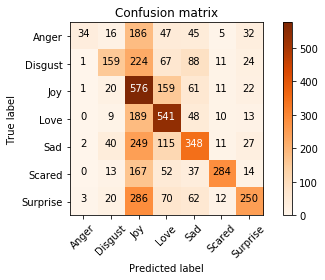

In [23]:
# Compute Naive Bayes confuson matrix
cnf_matrix = confusion_matrix(y_test, predicted_nb)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=pred_classes,
                      title='Confusion matrix')
from pylab import rcParams
rcParams['figure.figsize'] = 15,15
plt.show()

In [24]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(precision_score(y_test,predicted_nb, average="macro"))
print(recall_score(y_test,predicted_nb, average="macro")) 
print(f1_score(y_test, predicted_nb, average="macro"))

0.601429646314
0.430228144703
0.442755528196


In [25]:
performanceMatrix(predicted_nb)


,Precision,Recall,Fscore
Anger,0.83,0.09,0.17
Disgust,0.57,0.28,0.37
Joy,0.31,0.68,0.42
Love,0.51,0.67,0.58
Sad,0.51,0.44,0.47
Scared,0.83,0.50,0.62
Surprise,0.65,0.36,0.46


In [26]:
kappa=cohen_kappa_score(y_test, predicted_nb)
kappa

0.36401976113069545

## Fitting Random Forest

In [33]:
#Finding best parameters for Random Forest
bestParameter(RandomForestClassifier(n_estimators=50,random_state=0))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:  2.5min finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False))]


In [34]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
clf.fit(vec_train, y_train)
predicted_rf = clf.predict(vec_test)
print(accuracy_score(y_test,predicted_rf))

0.523921905171


In [ ]:
predicted_rf[0]

Confusion matrix
[[ 76  28 108  49  38   5  61]
 [  9 223 124  71  70  16  61]
 [  7  33 499 162  56  22  71]
 [  3  25 115 586  35   8  38]
 [ 11  48 148 120 386  11  68]
 [  5  26  94  48  33 326  35]
 [ 11  39 159  84  57   7 346]]


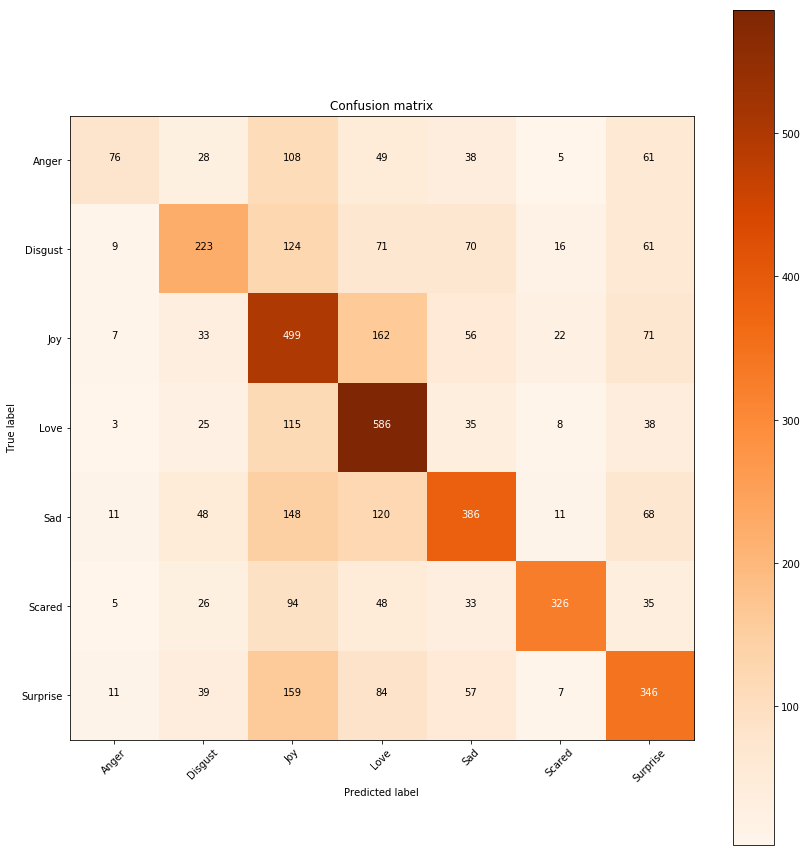

In [35]:
# Compute random forest confuson matrix
cnf_matrix = confusion_matrix(y_test, predicted_rf)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=pred_classes,
                      title='Confusion matrix')
from pylab import rcParams
rcParams['figure.figsize'] = 10,10
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(precision_score(y_test,predicted_rf, average="macro"))
print(recall_score(y_test,predicted_rf, average="macro")) 
print(f1_score(y_test, predicted_rf, average="macro"))

0.568679049461
0.494534652353
0.506776894938


In [37]:
performanceMatrix(predicted_rf)

,Precision,Recall,Fscore
Anger,0.62,0.21,0.31
Disgust,0.53,0.39,0.45
Joy,0.40,0.59,0.48
Love,0.52,0.72,0.61
Sad,0.57,0.49,0.53
Scared,0.83,0.57,0.68
Surprise,0.51,0.49,0.50


In [38]:
kappa=cohen_kappa_score(y_test, predicted_rf)
kappa

0.43278887913443642

## FItting LinearSVC

In [27]:
bestParameter(OneVsOneClassifier(LinearSVC(random_state=0)))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:   16.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   8 out of   8 | elapsed:   16.7s finished


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=1,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)), ('clf', OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=1))]


In [28]:
# Prediction using OneVsOneClassifier
predicted_svc=OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
          n_jobs=None).fit(vec_train, y_train).predict(vec_test)
print(accuracy_score(y_test,predicted_svc))

0.508903668741


Confusion matrix
[[101  42  74  39  40  18  51]
 [ 31 228  94  47  99  25  50]
 [ 33  48 418 153  90  31  77]
 [ 14  21 102 540  71  17  45]
 [ 41  82 106  96 395  19  53]
 [ 23  34  72  43  33 326  36]
 [ 34  50 109  59  59  28 364]]


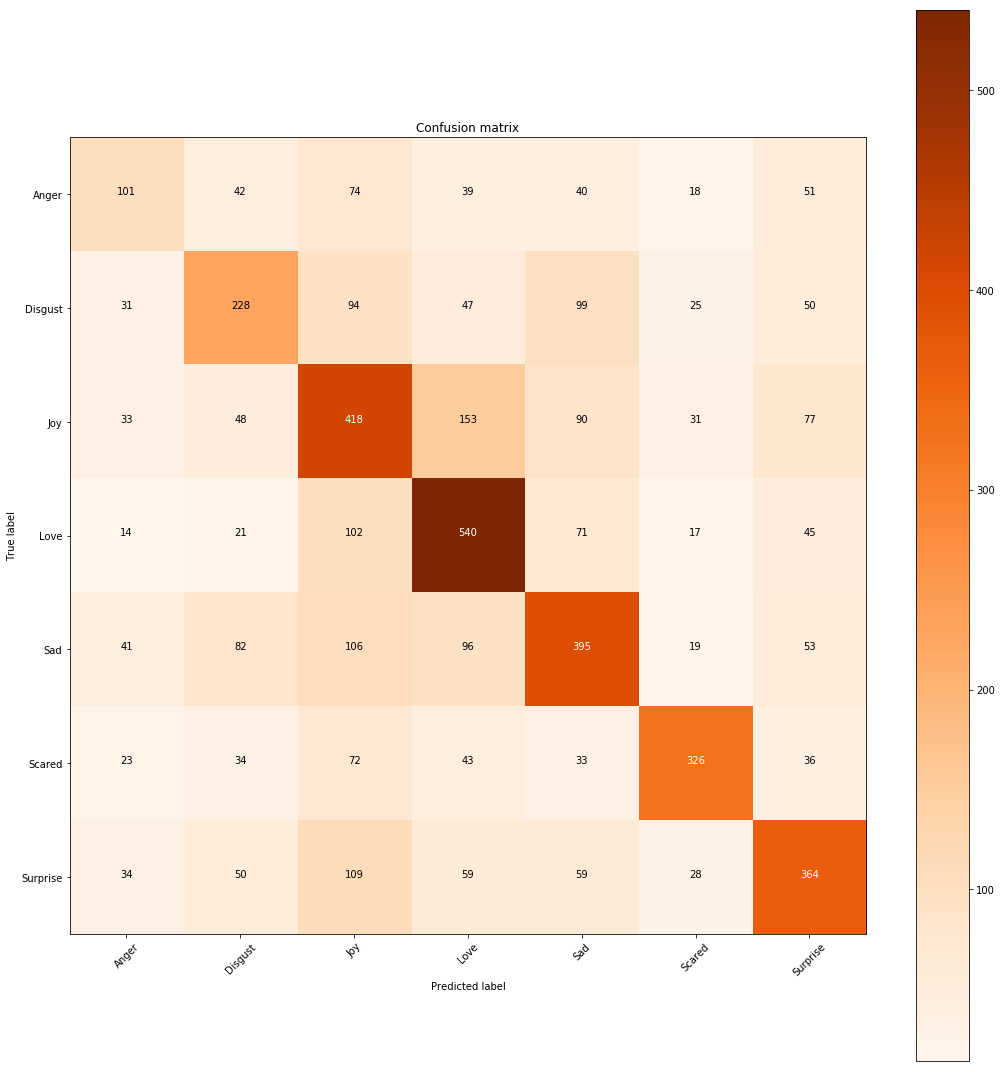

In [29]:
# Compute LinearSVC confuson matrix
cnf_matrix = confusion_matrix(y_test, predicted_svc)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=pred_classes,
                      title='Confusion matrix')
from pylab import rcParams
rcParams['figure.figsize'] = 12,12
plt.show()

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(precision_score(y_test,predicted_svc, average="macro"))
print(recall_score(y_test,predicted_svc, average="macro")) 
print(f1_score(y_test, predicted_svc, average="macro"))

0.505784305445
0.489118637961
0.494333356402


In [31]:
performanceMatrix(predicted_svc)

,Precision,Recall,Fscore
Anger,0.36,0.28,0.31
Disgust,0.45,0.40,0.42
Joy,0.43,0.49,0.46
Love,0.55,0.67,0.60
Sad,0.50,0.50,0.50
Scared,0.70,0.57,0.63
Surprise,0.54,0.52,0.53


In [32]:
kappa=cohen_kappa_score(y_test, predicted_svc)
kappa

0.41865141444031306